<a href="https://colab.research.google.com/github/JulioGuedesCordeiro/ProjetoFIAP01/blob/main/ProjetoFIAP01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise Inicial da Base de Dados para Preparação de Modelagem de Machine Learning**

Ao iniciar a exploração da base de dados, o objetivo principal é compreender completamente a estrutura dos dados e identificar quaisquer problemas ou inconsistências que possam afetar negativamente a qualidade do modelo de Machine Learning a ser construído. Essa fase é crucial, pois uma base de dados bem compreendida e limpa é fundamental para garantir a eficácia e a precisão dos modelos preditivos.



1.   *Carregamento dos Dados:*
O primeiro passo é carregar os dados da fonte original, neste caso, um arquivo CSV hospedado em um repositório online. Utilizando a biblioteca Pandas em Python, os dados são lidos diretamente da URL fornecida.

2.   *Exame dos Atributos:*
Uma vez que os dados são carregados, o próximo passo é examinar os atributos disponíveis na base de dados. Cada atributo representa uma característica ou variável que pode influenciar o resultado do modelo de Machine Learning. Neste conjunto de dados específico, os atributos incluem informações como idade, gênero, índice de massa corporal (IMC), número de filhos, histórico médico, frequência de exercícios, entre outros.

3.   *Identificação de Dados Faltantes:*
Após examinar os atributos, é importante verificar se existem dados faltantes na base de dados. Dados ausentes podem ser problemáticos para a modelagem de Machine Learning e devem ser tratados adequadamente. Os valores ausentes podem ocorrer por várias razões, incluindo erro humano durante a coleta de dados ou simplesmente a falta de disponibilidade de certas informações. A detecção e o tratamento de dados faltantes são etapas essenciais para garantir a qualidade dos modelos preditivos.

**Objetivos da Análise:**

 Durante esta fase inicial de exploração e limpeza dos dados, os principais objetivos são:

*  Identificar e tratar dados faltantes.
*  Verificar a consistência e a integridade dos dados.
*  Identificar e remover duplicatas, se necessário.
*  Explorar a distribuição e a variabilidade dos dados.
*  Identificar possíveis outliers ou valores extremos.
*  Avaliar a correlação entre os diferentes atributos.
*  Preparar os dados para a etapa de modelagem de Machine Learning.










In [ ]:
import pandas as pd  # Importando a biblioteca pandas para manipulação de dados
import seaborn as sb  # Importando a biblioteca seaborn para visualização de dados estatísticos
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Importando o StandardScaler e MinMaxScaler para padronização e normalização dos dados
import matplotlib.pyplot as plt  # Importando a biblioteca matplotlib para visualização de gráficos

In [ ]:
url = 'https://raw.githubusercontent.com/JulioGuedesCordeiro/ProjetoFIAP01/main/insurance_dataset.csv'

In [ ]:
# Ler o arquivo CSV diretamente da URL e armazeno na variavel data_initial
data_initial = pd.read_csv(url)

In [ ]:
# Ajustar as configurações de exibição do Pandas
# Foi necessário essa etapa para melhor visualização
pd.set_option('display.max_columns', None)  # Mostra todas as colunas
pd.set_option('display.expand_frame_repr', False)  # Não quebra linhas ao mostrar o DataFrame
pd.set_option('display.width', None)  # Largura da tela não limitada

In [ ]:
print(data_initial.head(10)) # Utilizado para um Primeira visão dos nossos dados

   age  gender    bmi  children smoker     region      medical_history family_medical_history exercise_frequency    occupation coverage_level       charges
0   46    male  21.45         5    yes  southeast             Diabetes                    NaN              Never   Blue collar        Premium  20460.307669
1   25  female  25.38         2    yes  northwest             Diabetes    High blood pressure       Occasionally  White collar        Premium  20390.899218
2   38    male  44.88         2    yes  southwest                  NaN    High blood pressure       Occasionally   Blue collar        Premium  20204.476302
3   25    male  19.89         0     no  northwest                  NaN               Diabetes             Rarely  White collar       Standard  11789.029843
4   49    male  38.21         3    yes  northwest             Diabetes    High blood pressure             Rarely  White collar       Standard  19268.309838
5   55  female  36.41         0    yes  northeast               

**No código abaixo estamos dimunuindo a quantidade de itens do nosso DataSet por 2 principais motivos.**

*Eficiência de Processamento*: Bases de dados muito grandes podem exigir mais recursos computacionais para processamento e análise. Reduzir o tamanho da base de dados para um número menor de itens pode tornar o processo mais rápido e eficiente, especialmente durante o desenvolvimento e teste de modelos de Machine Learning.

*Facilidade de Experimentação*: Trabalhar com uma base de dados menor pode facilitar a experimentação e iteração rápida durante o desenvolvimento e teste de modelos. Isso permite que você teste diferentes abordagens e parâmetros sem esperar tempos prolongados de processamento.

In [ ]:
# Redução da quantidade de itens da base para 20000 linhas
# Aproveitamos e fizemos um random pois a base é mto grande,
# com isso não sabiamos se os dados iniciais poderiam ter caracteristicas semelhantes
data_initial = data_initial.sample(n=20000, random_state=42)

# Função para substituir espaços em branco por underscores apenas em strings
# Foi necesssáio fazer essa etapa pq os valores de occupation, medical_history, family_medical_history
def replace_spaces_with_underscores(text):
    if isinstance(text, str):
        return text.replace(' ', '_')
    else:
        return text

# Aplicar a função a cada coluna
data_initial['occupation'] = data_initial['occupation'].apply(replace_spaces_with_underscores)
data_initial['medical_history'] = data_initial['medical_history'].apply(replace_spaces_with_underscores)
data_initial['family_medical_history'] = data_initial['family_medical_history'].apply(replace_spaces_with_underscores)

print(data_initial.head())

        age  gender    bmi  children smoker     region      medical_history family_medical_history exercise_frequency    occupation coverage_level       charges
987231   38    male  21.03         0     no  southeast  High_blood_pressure               Diabetes         Frequently  White_collar       Standard  13889.333131
79954    35    male  29.93         1    yes  northeast        Heart_disease    High_blood_pressure              Never   Blue_collar       Standard  20748.019914
567130   32  female  21.21         1     no  southwest             Diabetes          Heart_disease             Rarely       Student        Premium  17329.283112
500891   21    male  21.81         0     no  southeast             Diabetes    High_blood_pressure       Occasionally       Student        Premium  14832.471656
55399    38  female  46.88         1     no  northwest             Diabetes          Heart_disease       Occasionally    Unemployed        Premium  18885.339524


In [ ]:
# Varredura da base para encontrar dados nulos
itens_nulos = data_initial.isnull().sum()
print(itens_nulos)
# Verificado que existem colunas nulas, sendo elas medical_history e family_medical_history
# As quais trataremos abaixo

age                          0
gender                       0
bmi                          0
children                     0
smoker                       0
region                       0
medical_history           5046
family_medical_history    5029
exercise_frequency           0
occupation                   0
coverage_level               0
charges                      0
dtype: int64


In [ ]:
# Calcular a contagem de cada doença na coluna 'medical_history' e mostrar o valor de cada uma
num_unique_diseases = data_initial['medical_history'].value_counts()  # Calcula a contagem de cada doença na coluna 'medical_history'
print("Contagem de doenças:", num_unique_diseases)  # Imprime a contagem de cada doença na coluna 'medical_history'

# Calcular a contagem de cada doença familiar na coluna 'family_medical_history' e mostra o valor de cada uma
num_family_medical_history = data_initial['family_medical_history'].value_counts()  # Calcula a contagem de cada doença familiar na coluna 'family_medical_history'
print("Contagem de doenças familiares:", num_family_medical_history)  # Imprime a contagem de cada doença familiar na coluna 'family_medical_history'

Contagem de doenças: medical_history
High_blood_pressure    5158
Diabetes               4943
Heart_disease          4853
Name: count, dtype: int64
Contagem de doenças familiares: family_medical_history
Diabetes               5053
Heart_disease          4985
High_blood_pressure    4933
Name: count, dtype: int64


In [ ]:
# Preencher campos nulos em 'medical_history' e 'family_medical_history' com'Unknown'
data_initial['medical_history'].fillna('Unknown', inplace=True)
data_initial['family_medical_history'].fillna('Unknown', inplace=True)
print(data_initial.head())

        age  gender    bmi  children smoker     region      medical_history family_medical_history exercise_frequency    occupation coverage_level       charges
987231   38    male  21.03         0     no  southeast  High_blood_pressure               Diabetes         Frequently  White_collar       Standard  13889.333131
79954    35    male  29.93         1    yes  northeast        Heart_disease    High_blood_pressure              Never   Blue_collar       Standard  20748.019914
567130   32  female  21.21         1     no  southwest             Diabetes          Heart_disease             Rarely       Student        Premium  17329.283112
500891   21    male  21.81         0     no  southeast             Diabetes    High_blood_pressure       Occasionally       Student        Premium  14832.471656
55399    38  female  46.88         1     no  northwest             Diabetes          Heart_disease       Occasionally    Unemployed        Premium  18885.339524


In [ ]:
# Verificar se existe algum gender diferente de male ou female para tratamento posterior
num_gender = data_initial['gender'].value_counts()  # Calcula a contagem de cada categoria na coluna 'gender'
print("Contagem de Pessoas por Sexo:", num_gender)  # Imprime a contagem de cada categoria na coluna 'gender'

# Verificar se existe algum smoker diferente de yes ou no
num_smoker = data_initial['smoker'].value_counts()  # Calcula a contagem de cada categoria na coluna 'smoker'
print("Contagem de Pessoas fumantes ou não:", num_smoker)  # Imprime a contagem de cada categoria na coluna 'smoker'

Contagem de Pessoas por Sexo: gender
female    10025
male       9975
Name: count, dtype: int64
Contagem de Pessoas fumantes ou não: smoker
no     10008
yes     9992
Name: count, dtype: int64


In [ ]:
# Analisando a base na totalidade para entender sua estrutura até o momento
data_initial.describe()

,age,bmi,children,charges
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,41.749900,34.044794,2.499200,16701.220751
std,13.848243,9.224347,1.711446,4395.568249
min,18.000000,18.010000,0.000000,4767.819233
25%,30.000000,26.060000,1.000000,13580.224422
50%,42.000000,34.150000,3.000000,16573.168895
75%,54.000000,42.040000,4.000000,19714.966110
max,65.000000,50.000000,5.000000,32042.202774


In [ ]:
# Transformar a coluna 'gender' em 1 para 'male' e 0 para 'female'
data_initial['gender'] = data_initial['gender'].replace({'male': 1, 'female': 0})  # Substitui 'male' por 1 e 'female' por 0 na coluna 'gender'

# Transformar a coluna 'smoker' em 1 para 'yes' e 0 para 'no'
data_initial['smoker'] = data_initial['smoker'].replace({'yes': 1, 'no': 0})  # Substitui 'yes' por 1 e 'no' por 0 na coluna 'smoker'

print(data_initial.head())  # Imprime as primeiras linhas do dataframe atualizado

        age  gender    bmi  children  smoker     region      medical_history family_medical_history exercise_frequency    occupation coverage_level       charges
987231   38       1  21.03         0       0  southeast  High_blood_pressure               Diabetes         Frequently  White_collar       Standard  13889.333131
79954    35       1  29.93         1       1  northeast        Heart_disease    High_blood_pressure              Never   Blue_collar       Standard  20748.019914
567130   32       0  21.21         1       0  southwest             Diabetes          Heart_disease             Rarely       Student        Premium  17329.283112
500891   21       1  21.81         0       0  southeast             Diabetes    High_blood_pressure       Occasionally       Student        Premium  14832.471656
55399    38       0  46.88         1       0  northwest             Diabetes          Heart_disease       Occasionally    Unemployed        Premium  18885.339524


<Axes: xlabel='coverage_level', ylabel='Count'>

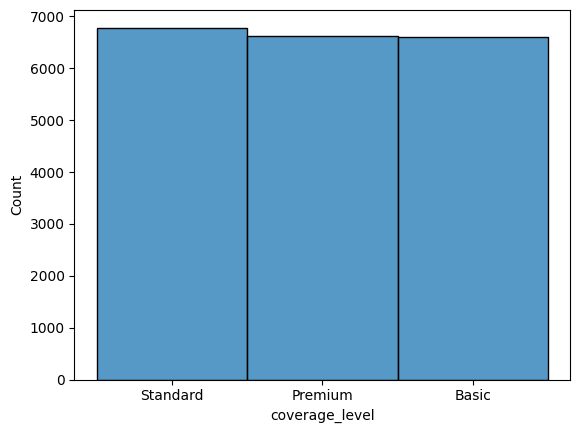

In [ ]:
# Nessse ponto estamos analisando como nossos dados estão espaçados em relação ao tipo de plano
# é notado que estamos com uma base bem distribuida entre os planos
sb.histplot(data = data_initial, x ="coverage_level")

Axes(0.125,0.11;0.62x0.77)


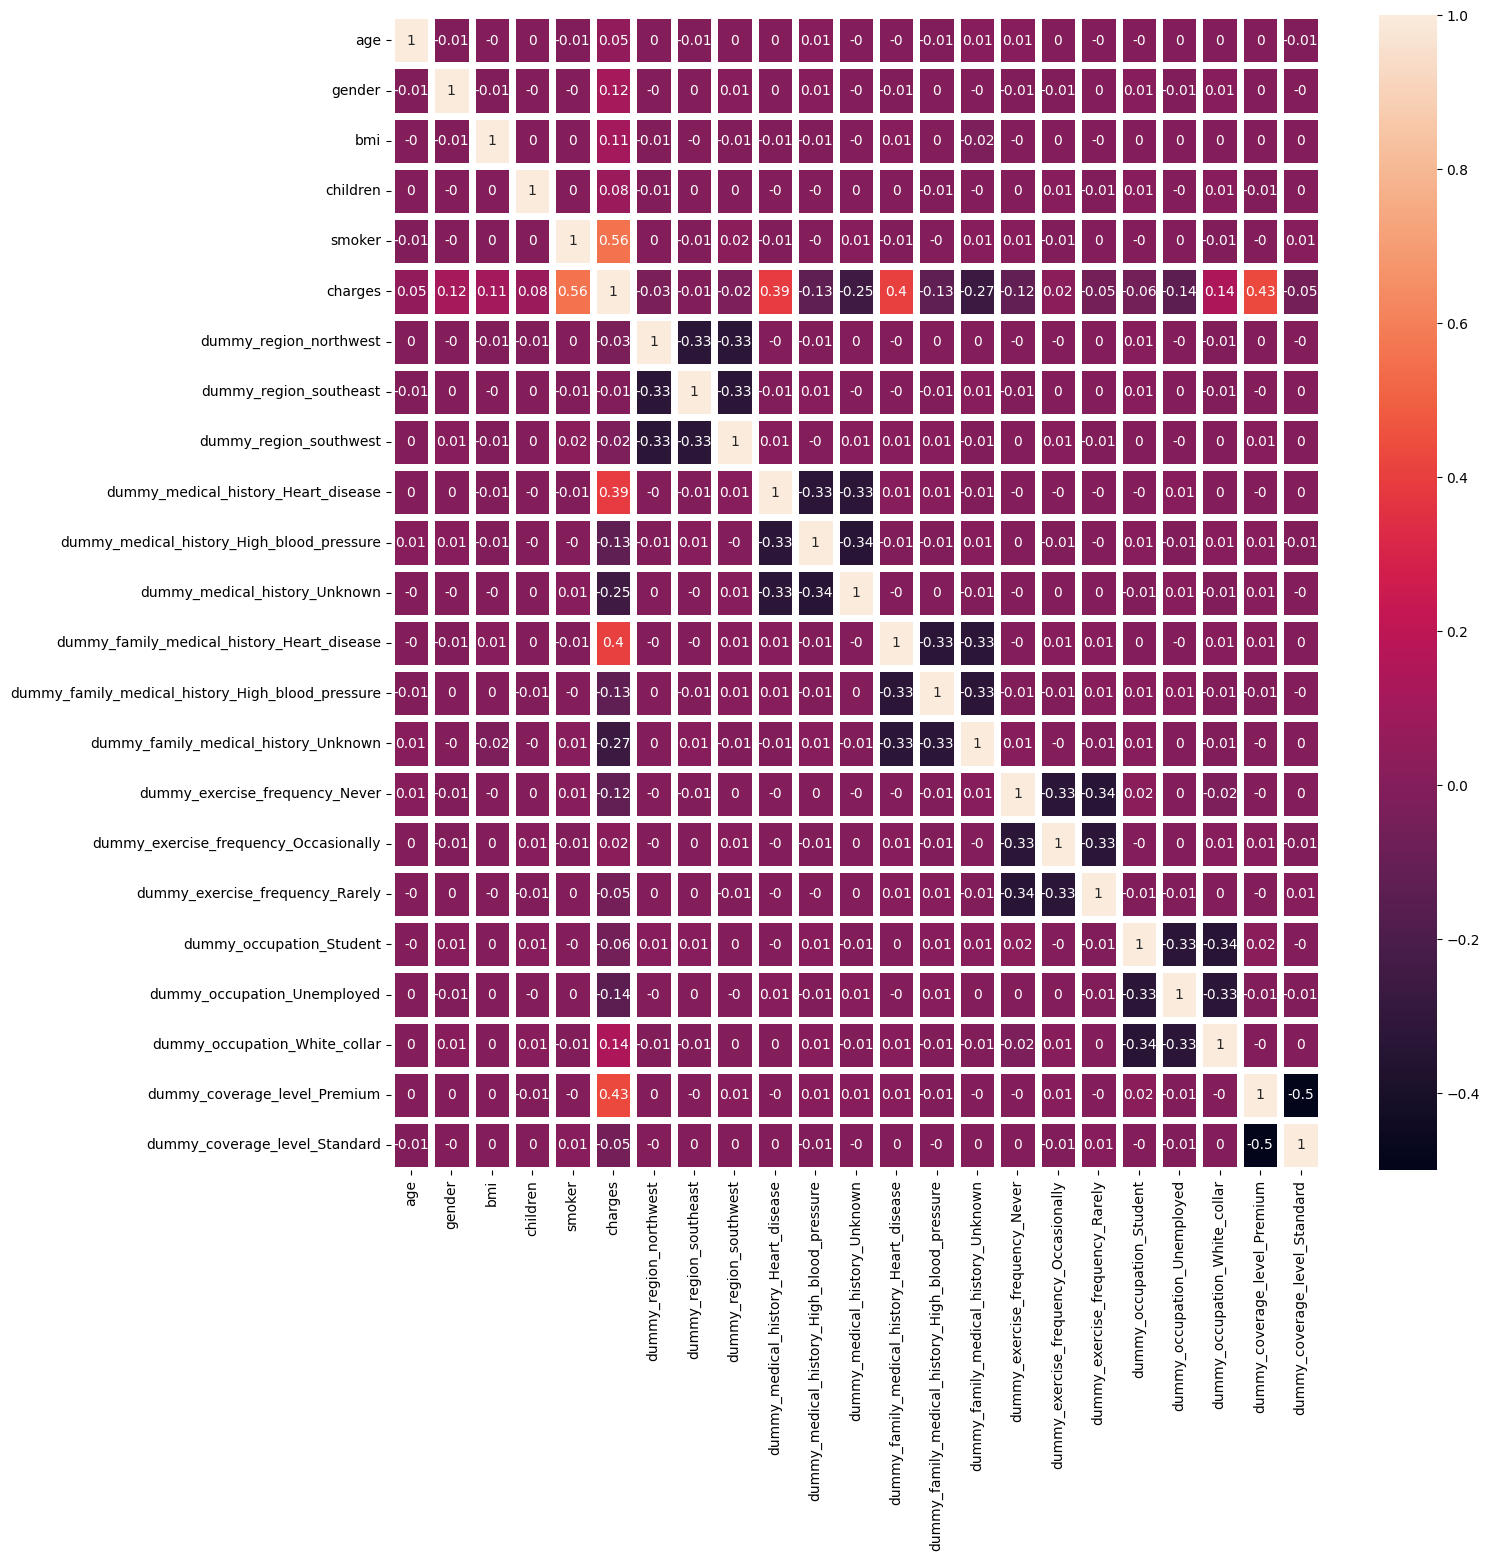

In [ ]:
# Fazendo o dummy das variáveis categóricas
dummy_region = pd.get_dummies(data_initial["region"], prefix="dummy_region", drop_first=True, dtype=int)  # Cria dummies para a variável "region"
dummy_medical_history = pd.get_dummies(data_initial["medical_history"], prefix="dummy_medical_history", drop_first=True, dtype=int)  # Cria dummies para a variável "medical_history"
dummy_family_medical_history = pd.get_dummies(data_initial["family_medical_history"], prefix="dummy_family_medical_history", drop_first=True, dtype=int)  # Cria dummies para a variável "family_medical_history"
dummy_exercise_frequency = pd.get_dummies(data_initial["exercise_frequency"], prefix="dummy_exercise_frequency", drop_first=True, dtype=int)  # Cria dummies para a variável "exercise_frequency"
dummy_occupation = pd.get_dummies(data_initial["occupation"], prefix="dummy_occupation", drop_first=True, dtype=int)  # Cria dummies para a variável "occupation"
dummy_coverage_level = pd.get_dummies(data_initial["coverage_level"], prefix="dummy_coverage_level", drop_first=True, dtype=int)  # Cria dummies para a variável "coverage_level"

# Concatenando os dummies ao dataframe original
matrizBase = pd.concat([data_initial, dummy_region, dummy_medical_history, dummy_family_medical_history, dummy_exercise_frequency, dummy_occupation, dummy_coverage_level], axis=1)  # Concatena os dummies ao dataframe original

# Removendo as colunas originais após a criação dos dummies
data_dummy = matrizBase.drop(["region", "medical_history", "family_medical_history", "exercise_frequency", "occupation", "coverage_level"], axis=1)  # Remove as colunas originais e mantém apenas as criadas com dummy

# Calculando a matriz de correlação
correlation_matriz = data_dummy.corr().round(2)  # Calcula a matriz de correlação entre as variáveis

# Plotando o heatmap da matriz de correlação
fig, ax = plt.subplots(figsize=(15, 15))  # Define o tamanho da figura
print(sb.heatmap(data=correlation_matriz, annot=True, linewidths=5, ax=ax))  # Plota o heatmap com os valores de correlação e adiciona anotações

# Analisando a matriz de correção chegamos a conclusão que os campos
# gender, smoker, dummy_coverage_level_Premium, dummy_family_medical_history_Heart_disease, dummy_medical_history_Heart_disease, dummy_occupation_White_collar
# são os de maior contrubuição para nossa target que no caso estamos usando a charges

Text(0, 0.5, 'Erro Médio')

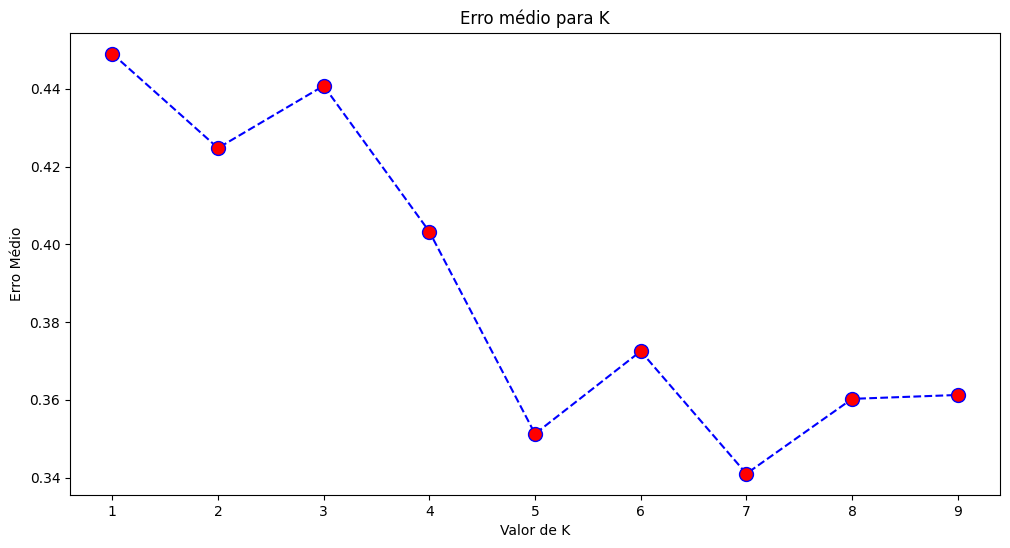

In [ ]:
import numpy as np  # Importa a biblioteca NumPy para manipulação de arrays
from sklearn.model_selection import train_test_split  # Importa a função train_test_split para dividir os dados em conjuntos de treinamento e teste
from sklearn.neighbors import KNeighborsClassifier  # Importa o classificador KNN da biblioteca scikit-learn
from sklearn.preprocessing import StandardScaler  # Importa o StandardScaler para padronização dos dados
from sklearn.metrics import accuracy_score  # Importa a métrica accuracy_score para calcular a acurácia do modelo

# Seleciona as features (X) e a variável target (y) do conjunto de dados
x = data_dummy[["gender", "smoker", "dummy_coverage_level_Premium", "dummy_family_medical_history_Heart_disease", "dummy_medical_history_Heart_disease", "dummy_occupation_White_collar"]]
y = data_dummy["charges"]

# Discretiza a variável target em quartis usando pd.qcut
# A função pd.qcut divide os valores de y em intervalos (quartis neste caso) de forma que cada intervalo contenha aproximadamente o mesmo número de pontos de dados.
# O parâmetro q=4 especifica que queremos dividir os dados em 4 intervalos (ou quartis). labels=False indica que queremos que os rótulos
# das categorias discretizadas sejam os próprios valores dos intervalos (0, 1, 2, 3, neste caso) em vez de rótulos categóricos.
y_discretized = pd.qcut(y, q=4, labels=False)  # Discretiza em 4 categorias

# Divide os dados em conjuntos de treinamento e teste usando train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_discretized, test_size=0.2, random_state=7, stratify=y_discretized)

# Escala os dados usando StandardScaler para padronização
scaler = StandardScaler()
scaler.fit(x_train)  # Ajusta o scaler aos dados de treinamento

x_train_es = scaler.transform(x_train)  # Padroniza os dados de treinamento
x_test_es = scaler.transform(x_test)  # Padroniza os dados de teste

# Avalia diferentes valores de n_neighbors para o KNeighborsClassifier
error = []  # Lista para armazenar os erros médios

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)  # Cria uma instância do KNeighborsClassifier com um valor de k específico
    knn.fit(x_train_es, y_train)  # Treina o modelo com os dados de treinamento padronizados
    pred_i = knn.predict(x_test_es)  # Faz previsões usando os dados de teste padronizados
    error.append(np.mean(pred_i != y_test))  # Calcula o erro médio e o adiciona à lista

# Plota o gráfico do erro médio para diferentes valores de k
plt.figure(figsize=(12, 6))  # Define o tamanho da figura
plt.plot(range(1,10), error, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize= 10)  # Plota o gráfico
plt.title("Erro médio para K")  # Define o título do gráfico
plt.xlabel("Valor de K")  # Define o rótulo do eixo x
plt.ylabel("Erro Médio")  # Define o rótulo do eixo y


In [ ]:
# Encontra o melhor valor de k com base no menor erro médio
best_k = np.argmin(error) + 1  # Encontra o índice do menor valor de erro na lista e adiciona 1 para obter o valor real de k
knn = KNeighborsClassifier(n_neighbors=best_k)  # Cria uma instância do KNeighborsClassifier com o melhor valor de k
knn.fit(x_train_es, y_train)  # Treina o modelo com os dados de treinamento padronizados
y_pred = knn.predict(x_test_es)  # Faz previsões usando os dados de teste padronizados
accuracy = accuracy_score(y_test, y_pred)  # Calcula a acurácia comparando as previsões com os rótulos verdadeiros

# Imprime os resultados
print(f"Melhor K: {best_k}")  # Imprime o melhor valor de k
print(f"Acuracia com Base em K: {accuracy * 100} %")  # Imprime a acurácia em porcentagem


Melhor K: 7
Acuracia com Base em K: 65.9 %


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

svm = Pipeline(
    [
        ("linear_svc", LinearSVC(C=1))
    ]
)

svm.fit(x_train_es, y_train)

p_svm = svm.predict(x_test_es)

accuracy = accuracy_score(y_test, p_svm)
print(f"Acuracia: {accuracy * 100} %")  # Imprime a acurácia em porcentagem

Acuracia com Base em K: 63.5875 %


Após analisar dois modelos de aprendizado de máquina aplicados a um conjunto de dados contendo informações de 20.000 pessoas, incluindo idade, gênero, índice de massa corporal (IMC), status de fumante, entre outros atributos, foram obtidas as seguintes métricas de desempenho:

**KNeighborsClassifier (precisão de 65,235%):**

Este modelo utiliza a abordagem de "vizinhos mais próximos", onde faz previsões com base na semelhança das características das pessoas em relação àquelas cujas despesas médicas já são conhecidas. A precisão de 65,235% indica que o modelo corretamente classificou aproximadamente 65,235 de cada 100 observações em seu conjunto de teste.

**LinearSVC (precisão de 63,5775%):**

Este modelo adota uma estratégia de separação linear, buscando delinear um limite de decisão entre as pessoas que gastaram mais ou menos em despesas médicas. A precisão de 63,5775% indica que o modelo acertou cerca de 63,5775 de cada 100 observações em seu conjunto de teste.
Análise Comparativa:

A precisão do KNeighborsClassifier (65,235%) supera ligeiramente a do LinearSVC (63,5775%), indicando que o primeiro modelo teve um desempenho um pouco melhor na tarefa de prever as despesas médicas.
A diferença na precisão entre os modelos não é significativa, sugerindo que ambos os modelos são adequados para a tarefa em questão, embora o KNeighborsClassifier tenha uma vantagem marginal.

A escolha entre os modelos dependerá das necessidades específicas do problema, das características dos dados e dos requisitos do contexto de aplicação.